<a href="https://colab.research.google.com/github/raghavkaushik2004/AlexNet-architechture/blob/main/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from keras import datasets, layers, models, losses
from tensorflow import newaxis

Now, the dataset MNIST has the dimensions of 28x28, so for making the number of channels = 3, we repeat it 3 times to get 28x28x3. So we have to reshape it to 227x227x3. The paper says it is 224x224x3, but for the math to come out right(The original paper said different numbers, but Andrej Karpathy, the former head of computer vision at Tesla, said it should be 227×227×3 (he said Alex didn't describe why he put 224×224×3)). So, we reshape the image size to 227x227x3.

In [4]:
# x_train = tf.pad(x_train, [[0, 0], [98, 97], [98, 97]]) / 255
# x_train = tf.expand_dims(x_train, axis = -1)
# x_train = tf.repeat(x_train, 3, axis = -1)
# x_train = tf.image.resize(x_train, (255, 255))

# Colab crashes due to RAM constraints

In [5]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]


11490434/11490434 [==============================] - 0s 0us/step


Using Bilinear Interpolation to resize the image

In [6]:
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear", input_shape=x_train.shape[1:]))

# 227x227x3 is now converted to 55x55x96 using
model.add(layers.Conv2D(96, (11, 11), strides = 4))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))

# max pooling layer applied on 55x55x96 with 3x3 window and stride = 2 to obtain an img of 27x27x96
model.add(layers.MaxPooling2D(3, strides = 2))

# 'same' convolution with 256 5x5 filers to get img of size 27x27x256
model.add(layers.Conv2D(256, 5, padding = "same"))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))

# max pooling layer applied on 27x27x256 with 3x3 window and stride = 2 to obtain an img of 13x13x256
model.add(layers.MaxPooling2D(3, strides = 2))

# 2 layers of 'same' convolution with 384 3x3 filters which makes the dim of the img to 13x13x384
model.add(layers.Conv2D(384, 3, padding = "same"))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, padding = "same"))
model.add(layers.Activation('relu'))

# one 'same' convolution with 256 3x3 filters which makes the dim of the img to 13x13x256
model.add(layers.Conv2D(256, 3, padding = "same"))
model.add(layers.Activation('relu'))

# max pooling layers with 6x6 window and stride = 2 to obtain an img of size 6x6x256
model.add(layers.MaxPooling2D(3, strides = 2))

# flattening the data into one-dimensional vector
model.add(layers.Flatten())

# first fully connected layer
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dropout(0.5))

#second full connected layer
model.add(layers.Dense(4096, activation = 'relu')),
model.add(layers.Dropout(0.5))

# the output layer, here we have 10 classes of output ( (0, 1, 2, 3, 4, 5, 6, 7, 8, 9) as we are working witht the mnist dataset)
model.add(layers.Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 55, 55, 96)        0         
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                        

In [8]:
model.compile(optimizer = 'adam', loss = losses.sparse_categorical_crossentropy, metrics = 'accuracy')
# print("x_train_shape: ", x_train.shape)
model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/10
907/907 [==============================] - 220s 228ms/step - loss: 0.2478 - accuracy: 0.9189 - val_loss: 0.0716 - val_accuracy: 0.9791
Epoch 2/10
907/907 [==============================] - 193s 213ms/step - loss: 0.0721 - accuracy: 0.9784 - val_loss: 0.0543 - val_accuracy: 0.9835
Epoch 3/10
907/907 [==============================] - 204s 224ms/step - loss: 0.0583 - accuracy: 0.9826 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 4/10
907/907 [==============================] - 204s 224ms/step - loss: 0.0518 - accuracy: 0.9852 - val_loss: 0.0417 - val_accuracy: 0.9869
Epoch 5/10
907/907 [==============================] - 204s 225ms/step - loss: 0.0473 - accuracy: 0.9862 - val_loss: 0.0384 - val_accuracy: 0.9889
Epoch 6/10
907/907 [==============================] - 204s 225ms/step - loss: 0.0424 - accuracy: 0.9883 - val_loss: 0.0402 - val_accuracy: 0.9869
Epoch 7/10
907/907 [==============================] - 194s 214ms/step - loss: 0.0416 - accuracy: 0.9888 - val_loss: 0.0538 -

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 11s 32ms/step - loss: 0.0355 - accuracy: 0.9920


[0.03545599430799484, 0.9919999837875366]

1/1 [==============================] - 1s 711ms/step


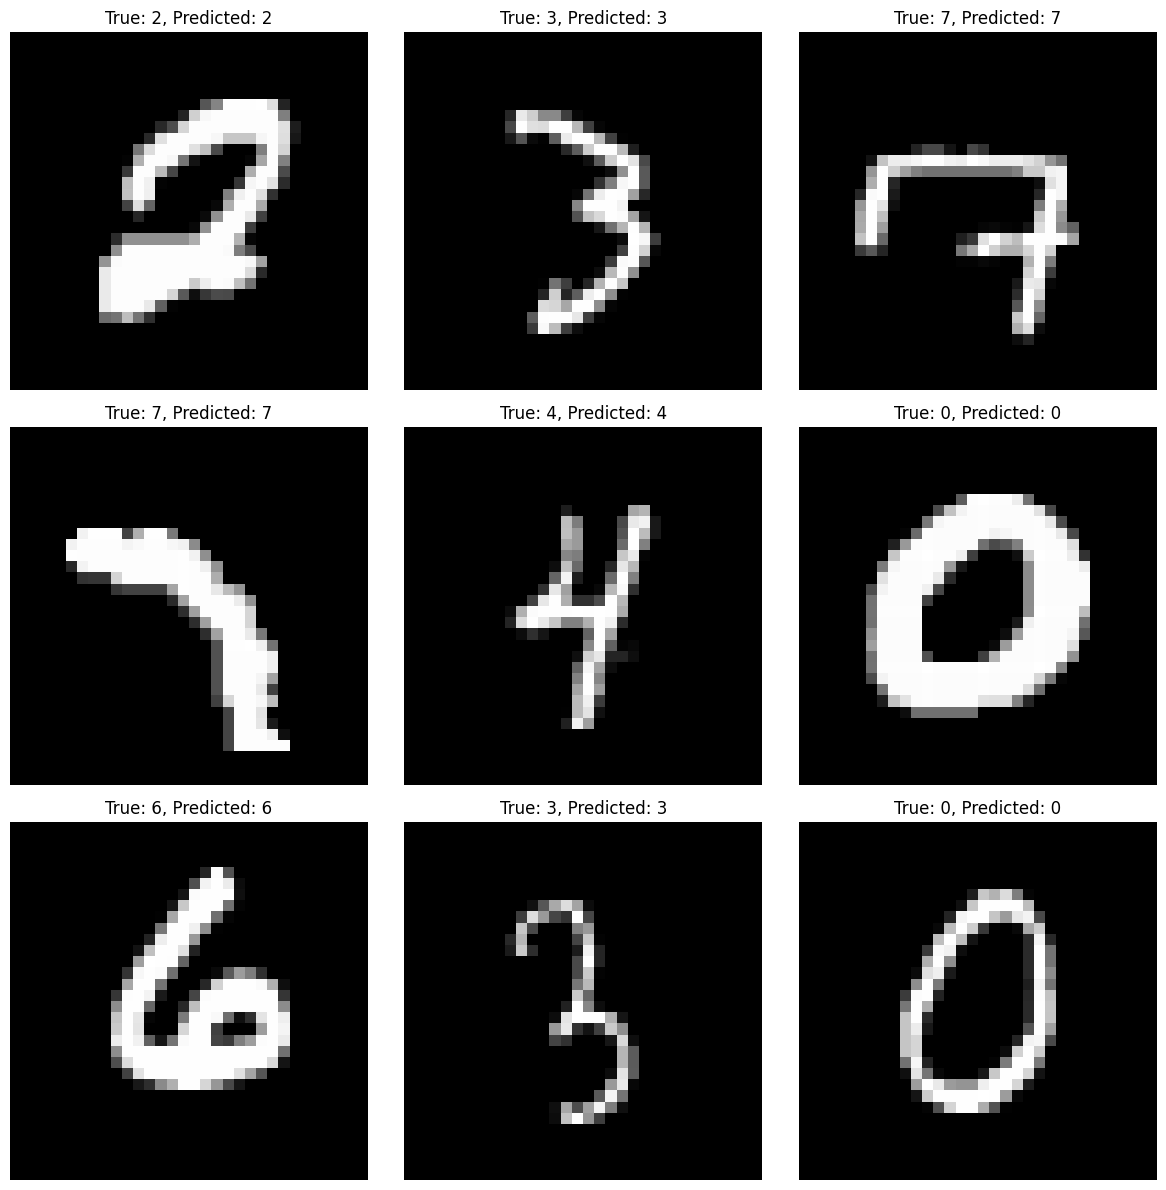

In [14]:
import numpy as np
import matplotlib.pyplot as plt

num_images = 9
random_indices = np.random.choice(len(x_test), num_images, replace=False)
images = tf.gather(x_test, random_indices)
true_labels = tf.gather(y_test, random_indices)

predictions = model.predict(images)
predicted_labels = tf.argmax(predictions, axis=1)

plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


313/313 [==============================] - 9s 30ms/step


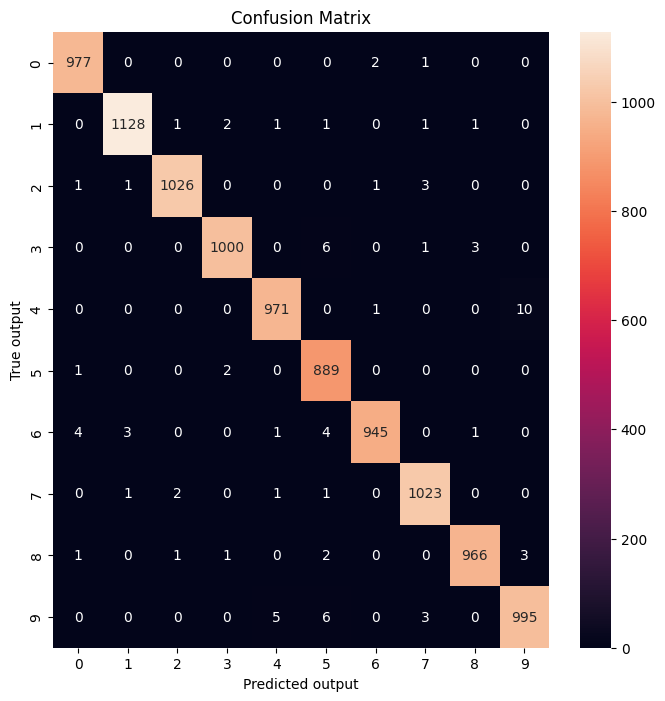

In [22]:
# confusion matrix

import seaborn as sn
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(x_test)
y_prediction = tf.argmax(y_prediction, axis = 1)
cm = confusion_matrix(y_test, y_prediction)
plt.figure(figsize = (8, 8))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted output')
plt.ylabel('True output')
plt.show()

Training and Validation accuracy